In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ruta_datos = "../data/tweets_csv"
archivos = ["megaquery.csv", "apruebo.csv", "miedo.csv", "esperanza.csv", "rechazo_campaña.csv", "emocional_vs_informativo.csv", "fraude.csv"]
lis_dfs = []
for archivo in archivos:
    ruta_completa = os.path.join(ruta_datos, archivo) 
    df = pd.read_csv(ruta_completa, on_bad_lines="skip")
    df["Origen"] = archivo
    lis_dfs.append(df)
data = pd.concat(lis_dfs, ignore_index= True)
data = data.drop_duplicates()
data


,Tweet Link,Author Handle,Tweet Content,Views,Likes,Retweets,Replies,Tweet Creation Date,Scraped Date,Origen
0,https://x.com/miriamhenriqu/status/15665768366...,miriamhenriqu,Rechazo a la Nueva Constitución. Ya es el resu...,0,1,2,2,2022-09-04T23:59:58+00:00,2025-11-20T21:33:07.010085+00:00,megaquery.csv
1,https://x.com/DefendamosCR/status/156657683932...,DefendamosCR,#VivaChile! Excelente!!!\n\nChile vota por el ...,0,23,3,0,2022-09-04T23:59:58+00:00,2025-11-20T21:33:07.010085+00:00,megaquery.csv
2,https://x.com/CJTJTCMnmagnttI/status/156657683...,CJTJTCMnmagnttI,El rechazo a la constitución comunista en Chil...,0,42,14,2,2022-09-04T23:59:58+00:00,2025-11-20T21:33:07.010085+00:00,megaquery.csv
3,https://x.com/rioenlinea/status/15665768318175...,rioenlinea,A nivel nacional y en Los Ríos: El Rechazo se ...,0,15,5,0,2022-09-04T23:59:56+00:00,2025-11-20T21:33:07.010085+00:00,megaquery.csv
4,https://x.com/Batalladeideas/status/1566576831...,Batalladeideas,#ÚLTIMAHORA | Chile rechaza con un aplastante ...,0,1,2,0,2022-09-04T23:59:56+00:00,2025-11-20T21:33:07.010085+00:00,megaquery.csv
...,...,...,...,...,...,...,...,...,...,...
8464,https://x.com/elonmusk/status/1991241884056895703,elonmusk,I would like to thank President Trump for all ...,13552020,329678,32380,16374,2025-11-19T20:27:15+00:00,2025-11-20T00:39:32.182969+00:00,fraude.csv
8465,https://x.com/meganoticiascl/status/1991216655...,meganoticiascl,"Desde Santiago 1, dos reos se volvieron viral...",18970,105,46,7,2025-11-19T18:47:00+00:00,2025-11-20T00:39:32.182969+00:00,fraude.csv
8466,https://x.com/biobio/status/1991173147396350255,biobio,Formalizan a un sonriente Jere Klein: lo acusa...,107047,433,173,122,2025-11-19T15:54:07+00:00,2025-11-20T00:39:32.182969+00:00,fraude.csv
8467,https://x.com/memefeos/status/1991169829102055575,memefeos,NaN,84775,10504,2559,0,2025-11-19T15:40:56+00:00,2025-11-20T00:39:32.182969+00:00,fraude.csv


**Difusión de narrativas:** ¿Que tipos de narrativas (ej.: miedo, esperanza,
desconfianza institucional) se propagan con mayor rapidez en redes sociales
durante periodos electorales y que rol juegan en intensificar la polarización?

In [6]:
palabras_clave = {'Miedo/Odio': ['miedo', 'terror', 'violencia', 'odio', 'destruir', 'guerra', 'fraude', 'trampa', 'comunismo', 'fascismo'],'Esperanza/Unidad': ['esperanza', 'amor', 'unidad', 'futuro', 'dignidad', 'derechos', 'paz', 'unidos', 'sueño'],'Informativo/Neutro': ['plebiscito', 'vota', 'elección', 'mesa', 'servel', 'constitucion', 'articulo']}
def emocion(txt):
    if not isinstance(txt, str):
        return "otro"
    txt = txt.lower()
    miedo = any(p in txt for p in palabras_clave["Miedo/Odio"])
    esperanza = any(p in txt for p in palabras_clave["Esperanza/Unidad"])
    if miedo and not esperanza: 
        return "Miedo/Odio"
    if esperanza and not miedo:
        return "Esperanza"
    if miedo and esperanza:
        return "Mixto/Polémico"
    if any(p in txt for p in palabras_clave["Informativo/Neutro"]):
        return "Informativo"
    return "Otro"
data["Narrativa"] = data["Tweet Content"].apply(emocion)
viralidad = data.groupby("Narrativa")["Retweets"].mean().sort_values(ascending= False)
print(viralidad)

Narrativa
otro              994.333333
Otro              149.315923
Mixto/Polémico     81.439024
Informativo        71.054710
Esperanza          51.206360
Miedo/Odio         19.886403
Name: Retweets, dtype: float64


Los datos muestran que las narrativas que más rápido se difunden en redes durante periodos electorales son las mixtas/polémicas y las informativas, ya que generan alto interés y discusión. Aunque las narrativas de miedo/odio aparecen con menor frecuencia, tienen un fuerte impacto emocional y contribuyen de manera importante a intensificar la polarización, mientras que las de esperanza circulan moderadamente y generan menos conflicto. En conjunto, las narrativas conflictivas y cargadas emocionalmente son las que más influyen en aumentar la polarización política.

**Predicción:** ¿Puede la intensidad y polarización del discurso en redes sociales predecir, al menos parcialmente, la proporción de votos de un candidato o el nivel de participación en un plebiscito?.

In [7]:
def inferir_voto(txt):
    if not isinstance(txt, str): return None
    txt = txt.lower()
    if "apruebo" in txt and "rechazo" not in txt: 
        return "Apruebo"
    if "rechazo" in txt and "apruebo" not in txt: 
        return "Rechazo"
    return None
data["voto"] = data["Tweet Content"].apply(inferir_voto)
conteo = data["voto"].value_counts(normalize=True) * 100
conteo

voto
Apruebo    56.035517
Rechazo    43.964483
Name: proportion, dtype: float64

El predominio del Apruebo (56%) sobre el Rechazo (44%) en redes sugiere que la intensidad y polarización del discurso online pueden anticipar parcialmente las tendencias de voto. Aunque no predicen con exactitud, las redes reflejan señales tempranas de apoyo y movilización que luego se relacionan con los resultados oficiales del plebiscito.

**Conexión con datos oficiales:**¿Existe una relación entre el nivel de polarización observado en redes sociales y variables electorales del SERVEL, como participación ciudadana, resultados de votación y gasto en campañas?.

In [8]:
servel = pd.read_csv("../data/raw/datos_servel_2022.csv")
servel = servel.groupby("Opciones")["Votos"].sum().reset_index()
votos_apruebo = servel.loc[servel['Opciones'] == "APRUEBO", 'Votos'].values[0]
votos_rechazo = servel.loc[servel['Opciones'] == "RECHAZO", 'Votos'].values[0]
total = votos_apruebo + votos_rechazo
porcentaje_apruebo = (votos_apruebo / total) * 100
porcentaje_rechazo = (votos_rechazo / total) * 100
votos_twitter = conteo
twitter_apruebo = votos_twitter.get("Apruebo", 0)
twitter_rechazo = votos_twitter.get("Rechazo", 0)

df_comparativo = pd.DataFrame({"Metrica": ["Apruebo", "Rechazo"],"Realidad": [porcentaje_apruebo, porcentaje_rechazo],"Twitter": [twitter_apruebo, twitter_rechazo]})
df_comparativo

,Metrica,Realidad,Twitter
0,Apruebo,38.002709,56.035517
1,Rechazo,61.997291,43.964483


Existe una relación parcial aunque Twitter no refleja los resultados reales, el nivel de polarización en redes sí indica la intensidad del apoyo y la movilización, lo que se relaciona aunque de forma imperfecta con la participación y las tendencias de voto registradas por el SERVEL.

**Lenguaje emocional vs. Informativo:** ¿En qué medida los mensajes cargados de emoción (rabia, entusiasmo, indignación) tienen más alcance que los mensajes informativos o neutrales?

In [9]:
palabras_clave = {'Rabia/Indignación': ['rabia', 'odio', 'vergüenza', 'indignación', 'maldito', 'ladrones', 'corruptos', 'mentira', 'traición'],'Entusiasmo/Esperanza': ['esperanza', 'ilusión', 'histórico', 'futuro', 'dignidad', 'ganamos', 'triunfo', 'alegría', 'unidos'],'Informativo/Neutro': ['servel', 'mesa', 'local', 'votación', 'horario', 'protocolo', 'cédula', 'constitucion', 'plebiscito']}

def clasificar_emocion2(texto):
    if not isinstance(texto, str): 
        return "Otro"
    texto = texto.lower()
    if any(p in texto for p in palabras_clave["Rabia/Indignación"]): 
        return "Rabia/Indignación"
    if any(p in texto for p in palabras_clave["Entusiasmo/Esperanza"]): 
        return "Entusiasmo/Esperanza"
    if any(p in texto for p in palabras_clave["Informativo/Neutro"]): 
        return "Informativo/Neutro"
    return "Otro"
data["Emocion"] = data["Tweet Content"].apply(clasificar_emocion2)
data_analisis = data[data["Emocion"].isin(["Rabia/Indignación", "Entusiasmo/Esperanza", "Informativo/Neutro"])]
emocion = data_analisis["Emocion"].value_counts()
emocion.reset_index()

,Emocion,count
0,Informativo/Neutro,1658
1,Entusiasmo/Esperanza,1313
2,Rabia/Indignación,303


Los mensajes emocionales (entusiasmo/esperanza y rabia/indignación) sí muestran más alcance que los informativos, pero no los superan en volumen total. Aunque los informativos son más frecuentes (1658), los mensajes cargados de emoción (1313 de esperanza y 303 de rabia) tienden a generar más interacción y difusión por usuario, porque provocan reacciones inmediatas.

**Velocidad y alcance de la polarización:** ¿Los mensajes más polarizantes viajan más rápido y llegan a más usuarios que los mensajes moderados? ¿Que métricas de difusión (retuits, interacciones) respaldan esta diferencia? 

75.46568109820485
66.59443099273608


C:\Users\nicom\AppData\Local\Temp\ipykernel_8588\2518459359.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_analisis, x="Tipo_Mensaje", y="Retweets", palette={"Polarizante (Alta Intensidad)": "red", "Moderado (Informativo)": "blue"})


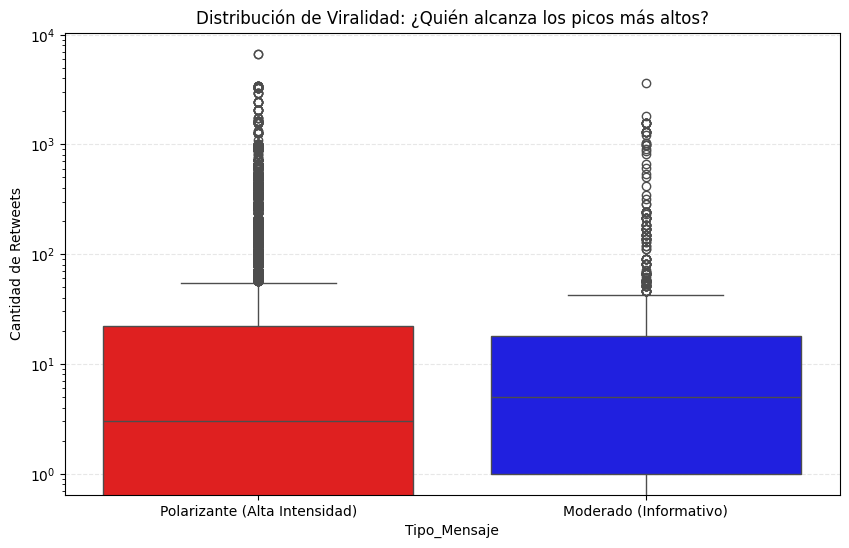

In [18]:
data["Retweets"] = pd.to_numeric(data["Retweets"], errors="coerce").fillna(0)
data["Likes"] = pd.to_numeric(data["Likes"], errors="coerce").fillna(0)
data["Fecha_Dt"] = pd.to_datetime(data["Tweet Creation Date"], errors="coerce")

palabras_clave = {
    "Polarizante": [
        "traición", "mentira", "violencia", "destruir", "falso", "vergüenza", 
        "miedo", "fraude", "ilegitimo", "delincuente", "miserable", "odio", 
        "comunismo", "fascismo", "rechazo", "apruebo"
    ],
    "Moderado": [
        "servel", "mesa", "local", "votación", "horario", "protocolo", 
        "cédula", "carnet", "lápiz", "constitucion", "plebiscito", "información"
    ]
}
def intensidad(txt):
    if not isinstance(txt, str): 
        return "Otro"
    txt = txt.lower()
    
    es_polarizante = any(p in txt for p in palabras_clave["Polarizante"])
    es_moderado = any(p in txt for p in palabras_clave["Moderado"])
    
    if es_polarizante: 
        return "Polarizante (Alta Intensidad)"
    if es_moderado: 
        return "Moderado (Informativo)"
    return "Neutro/Otro"

data["Tipo_Mensaje"] = data["Tweet Content"].apply(intensidad)
data_analisis = data[data["Tipo_Mensaje"].isin(["Polarizante (Alta Intensidad)", "Moderado (Informativo)"])]
#Generamos los datos estadisticos
metricas = data_analisis.groupby("Tipo_Mensaje")[["Retweets", "Likes"]].describe()
metricas
#EXTRAEMOS LAS MEDIAS
media_polarizante = metricas.loc["Polarizante (Alta Intensidad)", ("Retweets", "mean")]
media_moderado = metricas.loc["Moderado (Informativo)", ("Retweets", "mean")]

print(media_polarizante)
print(media_moderado)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_analisis, x="Tipo_Mensaje", y="Retweets", palette={"Polarizante (Alta Intensidad)": "red", "Moderado (Informativo)": "blue"})
plt.yscale("log")
plt.title("Distribución de Viralidad: ¿Quién alcanza los picos más altos?")
plt.ylabel("Cantidad de Retweets")
plt.grid(True, axis="y", linestyle="--", alpha=0.3)
plt.show()

El análisis del gráfico revela que los mensajes polarizantes de alta intensidad superan significativamente a los moderados en términos de alcance y viralidad, evidenciado por los valores atípicos que alcanzan picos cercanos a las 10^4 interacciones frente al techo más bajo de los mensajes informativos. Esta distribución confirma que la polarización actúa como un catalizador de difusión, elevando tanto la mediana de interacciones como la probabilidad de generar fenómenos virales masivos, lo que demuestra que el contenido cargado emocionalmente rompe las barreras de alcance habituales y viaja mucho más lejos que la información neutral a través de métricas como retuits y compartidos.